In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from sklearn.model_selection import train_test_split
sns.set_theme()
sns.set_palette("Set2")
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["figure.figsize"] = (20,8)

In [4]:
df  =  pd.read_csv("train_1.csv")

In [5]:
df_exo  = pd.read_csv("Exog_Campaign_eng.csv")

In [6]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [7]:
df.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [8]:
df.shape

(145063, 551)

In [9]:
df.drop_duplicates()

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
...                                                   ...         ...   
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
4              NaN         NaN         NaN  ...        48.0         9.0   
...            ...         ...         ...  ...         ...         ...   
145058         NaN         NaN         NaN  ...         NaN         NaN   
145059         NaN         NaN         NaN  ...         NaN         NaN   
145060         NaN         NaN         NaN  ...         NaN         NaN   
145061         NaN         NaN         NaN  ...         NaN         NaN   
145062         NaN         NaN         NaN  ...         NaN         NaN   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
4             25.0        13.0         3.0        11.0        27.0   
...            ...         ...         ...         ...         ...   
145058         NaN         NaN        13.0        12.0        13.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
4             13.0        36.0        10.0  
...            ...         ...         ...  
145058         3.0         5.0        10.0  
145059         NaN         NaN         NaN  
145060         NaN         NaN         NaN  
145061         NaN         NaN         NaN  
145062         NaN         NaN         NaN  

[145063 rows x 551 columns]

No duplicates

In [10]:
df.dropna(axis=1).shape

(145063, 1)

trying to drop the data that has null in all of the columns

In [11]:
df = df.dropna(axis=0,thresh=300)

Dropping the data that has null for more than 300 days

In [12]:
df = df.fillna(0)

Filling the null with zero indicating no sales

In [13]:
df

Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
5                 5566_zh.wikipedia.org_all-access_spider        12.0   
...                                                   ...         ...   
145012  Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...         0.0   
145013  Referéndum_sobre_la_permanencia_del_Reino_Unid...         0.0   
145014  Salida_del_Reino_Unido_de_la_Unión_Europea_es....         0.0   
145015  Amar,_después_de_amar_es.wikipedia.org_all-acc...         0.0   
145016  Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-...         0.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0             11.0         5.0        13.0        14.0         9.0   
1             14.0        15.0        18.0        11.0        13.0   
2              0.0         1.0         1.0         0.0         4.0   
3             13.0        10.0        94.0         4.0        26.0   
5              7.0         4.0         5.0        20.0         8.0   
...            ...         ...         ...         ...         ...   
145012         0.0         0.0         0.0         0.0         0.0   
145013         0.0         0.0         0.0         0.0         0.0   
145014         0.0         0.0         0.0         0.0         0.0   
145015         0.0         0.0         0.0         0.0         0.0   
145016         0.0         0.0         0.0         0.0         0.0   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
0              9.0        22.0        26.0  ...        32.0        63.0   
1             22.0        11.0        10.0  ...        17.0        42.0   
2              0.0         3.0         4.0  ...         3.0         1.0   
3             14.0         9.0        11.0  ...        32.0        10.0   
5              5.0        17.0        24.0  ...        16.0        27.0   
...            ...         ...         ...  ...         ...         ...   
145012         0.0         0.0         0.0  ...         7.0         3.0   
145013         0.0         0.0         0.0  ...         9.0        16.0   
145014         0.0         0.0         0.0  ...        29.0        36.0   
145015         0.0         0.0         0.0  ...         7.0        30.0   
145016         0.0         0.0         0.0  ...         0.0         0.0   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
5              8.0        17.0        32.0        19.0        23.0   
...            ...         ...         ...         ...         ...   
145012         2.0         4.0         2.0         4.0         4.0   
145013         8.0         3.0         6.0         3.0         3.0   
145014        23.0       182.0        43.0         8.0        22.0   
145015        27.0        14.0         8.0         7.0         5.0   
145016         1.0         0.0         1.0         0.0         0.0   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
5             17.0        17.0        50.0  
...            ...         ...         ...  
145012         1.0         2.0         2.0  
145013        10.0        11.0         3.0  
145014        13.0        18.0        14.0  
145015        43.0        12.0        25.0  
145016         1.0         1.0         0.0  

[133617 rows x 551 columns]

In [14]:
def split_page(page):
    w = re.split('_|\.', page)
    return ' '.join(w[:-5]), w[-5], w[-2], w[-1]



In [15]:
new_df = df.copy()

In [16]:
new_df_1 = pd.DataFrame(list(new_df["Page"].apply(split_page)))
new_df_1.columns = ["SPECIFIC NAME","LANGUAGE","ACCESS TYPE","ACCESS ORIGIN"]

In [17]:
new_df_1

SPECIFIC NAME LANGUAGE  \
0                                                    2NE1       zh   
1                                                     2PM       zh   
2                                                      3C       zh   
3                                                 4minute       zh   
4                                                    5566       zh   
...                                                   ...      ...   
133612                             Legión (Marvel Comics)       es   
133613  Referéndum sobre la permanencia del Reino Unid...       es   
133614         Salida del Reino Unido de la Unión Europea       es   
133615                              Amar, después de amar       es   
133616                           Anexo:89 º Premios Óscar       es   

       ACCESS TYPE ACCESS ORIGIN  
0       all-access        spider  
1       all-access        spider  
2       all-access        spider  
3       all-access        spider  
4       all-access        spider  
...            ...           ...  
133612  all-access        spider  
133613  all-access        spider  
133614  all-access        spider  
133615  all-access        spider  
133616  all-access        spider  

[133617 rows x 4 columns]

In [18]:
new_df.drop(columns="Page",inplace=True)

In [19]:
new_df = new_df.reset_index(drop=True)

In [20]:
new_df

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
0             18.0        11.0         5.0        13.0        14.0   
1             11.0        14.0        15.0        18.0        11.0   
2              1.0         0.0         1.0         1.0         0.0   
3             35.0        13.0        10.0        94.0         4.0   
4             12.0         7.0         4.0         5.0        20.0   
...            ...         ...         ...         ...         ...   
133612         0.0         0.0         0.0         0.0         0.0   
133613         0.0         0.0         0.0         0.0         0.0   
133614         0.0         0.0         0.0         0.0         0.0   
133615         0.0         0.0         0.0         0.0         0.0   
133616         0.0         0.0         0.0         0.0         0.0   

        2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  \
0              9.0         9.0        22.0        26.0        24.0  ...   
1             13.0        22.0        11.0        10.0         4.0  ...   
2              4.0         0.0         3.0         4.0         4.0  ...   
3             26.0        14.0         9.0        11.0        16.0  ...   
4              8.0         5.0        17.0        24.0         7.0  ...   
...            ...         ...         ...         ...         ...  ...   
133612         0.0         0.0         0.0         0.0         0.0  ...   
133613         0.0         0.0         0.0         0.0         0.0  ...   
133614         0.0         0.0         0.0         0.0         0.0  ...   
133615         0.0         0.0         0.0         0.0         0.0  ...   
133616         0.0         0.0         0.0         0.0         0.0  ...   

        2016-12-22  2016-12-23  2016-12-24  2016-12-25  2016-12-26  \
0             32.0        63.0        15.0        26.0        14.0   
1             17.0        42.0        28.0        15.0         9.0   
2              3.0         1.0         1.0         7.0         4.0   
3             32.0        10.0        26.0        27.0        16.0   
4             16.0        27.0         8.0        17.0        32.0   
...            ...         ...         ...         ...         ...   
133612         7.0         3.0         2.0         4.0         2.0   
133613         9.0        16.0         8.0         3.0         6.0   
133614        29.0        36.0        23.0       182.0        43.0   
133615         7.0        30.0        27.0        14.0         8.0   
133616         0.0         0.0         1.0         0.0         1.0   

        2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0             20.0        22.0        19.0        18.0        20.0  
1             30.0        52.0        45.0        26.0        20.0  
2              4.0         6.0         3.0         4.0        17.0  
3             11.0        17.0        19.0        10.0        11.0  
4             19.0        23.0        17.0        17.0        50.0  
...            ...         ...         ...         ...         ...  
133612         4.0         4.0         1.0         2.0         2.0  
133613         3.0         3.0        10.0        11.0         3.0  
133614         8.0        22.0        13.0        18.0        14.0  
133615         7.0         5.0        43.0        12.0        25.0  
133616         0.0         0.0         1.0         1.0         0.0  

[133617 rows x 550 columns]

In [21]:
new_df = pd.concat([new_df_1,new_df],axis=1)

In [22]:
new_df

SPECIFIC NAME LANGUAGE  \
0                                                    2NE1       zh   
1                                                     2PM       zh   
2                                                      3C       zh   
3                                                 4minute       zh   
4                                                    5566       zh   
...                                                   ...      ...   
133612                             Legión (Marvel Comics)       es   
133613  Referéndum sobre la permanencia del Reino Unid...       es   
133614         Salida del Reino Unido de la Unión Europea       es   
133615                              Amar, después de amar       es   
133616                           Anexo:89 º Premios Óscar       es   

       ACCESS TYPE ACCESS ORIGIN  2015-07-01  2015-07-02  2015-07-03  \
0       all-access        spider        18.0        11.0         5.0   
1       all-access        spider        11.0        14.0        15.0   
2       all-access        spider         1.0         0.0         1.0   
3       all-access        spider        35.0        13.0        10.0   
4       all-access        spider        12.0         7.0         4.0   
...            ...           ...         ...         ...         ...   
133612  all-access        spider         0.0         0.0         0.0   
133613  all-access        spider         0.0         0.0         0.0   
133614  all-access        spider         0.0         0.0         0.0   
133615  all-access        spider         0.0         0.0         0.0   
133616  all-access        spider         0.0         0.0         0.0   

        2015-07-04  2015-07-05  2015-07-06  ...  2016-12-22  2016-12-23  \
0             13.0        14.0         9.0  ...        32.0        63.0   
1             18.0        11.0        13.0  ...        17.0        42.0   
2              1.0         0.0         4.0  ...         3.0         1.0   
3             94.0         4.0        26.0  ...        32.0        10.0   
4              5.0        20.0         8.0  ...        16.0        27.0   
...            ...         ...         ...  ...         ...         ...   
133612         0.0         0.0         0.0  ...         7.0         3.0   
133613         0.0         0.0         0.0  ...         9.0        16.0   
133614         0.0         0.0         0.0  ...        29.0        36.0   
133615         0.0         0.0         0.0  ...         7.0        30.0   
133616         0.0         0.0         0.0  ...         0.0         0.0   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0             15.0        26.0        14.0        20.0        22.0   
1             28.0        15.0         9.0        30.0        52.0   
2              1.0         7.0         4.0         4.0         6.0   
3             26.0        27.0        16.0        11.0        17.0   
4              8.0        17.0        32.0        19.0        23.0   
...            ...         ...         ...         ...         ...   
133612         2.0         4.0         2.0         4.0         4.0   
133613         8.0         3.0         6.0         3.0         3.0   
133614        23.0       182.0        43.0         8.0        22.0   
133615        27.0        14.0         8.0         7.0         5.0   
133616         1.0         0.0         1.0         0.0         0.0   

        2016-12-29  2016-12-30  2016-12-31  
0             19.0        18.0        20.0  
1             45.0        26.0        20.0  
2              3.0         4.0        17.0  
3             19.0        10.0        11.0  
4             17.0        17.0        50.0  
...            ...         ...         ...  
133612         1.0         2.0         2.0  
133613        10.0        11.0         3.0  
133614        13.0        18.0        14.0  
133615        43.0        12.0        25.0  
133616         1.0         1.0         0.0  

[133617 rows x 554 columns]

### Most common language

<Axes: xlabel='LANGUAGE', ylabel='count'>

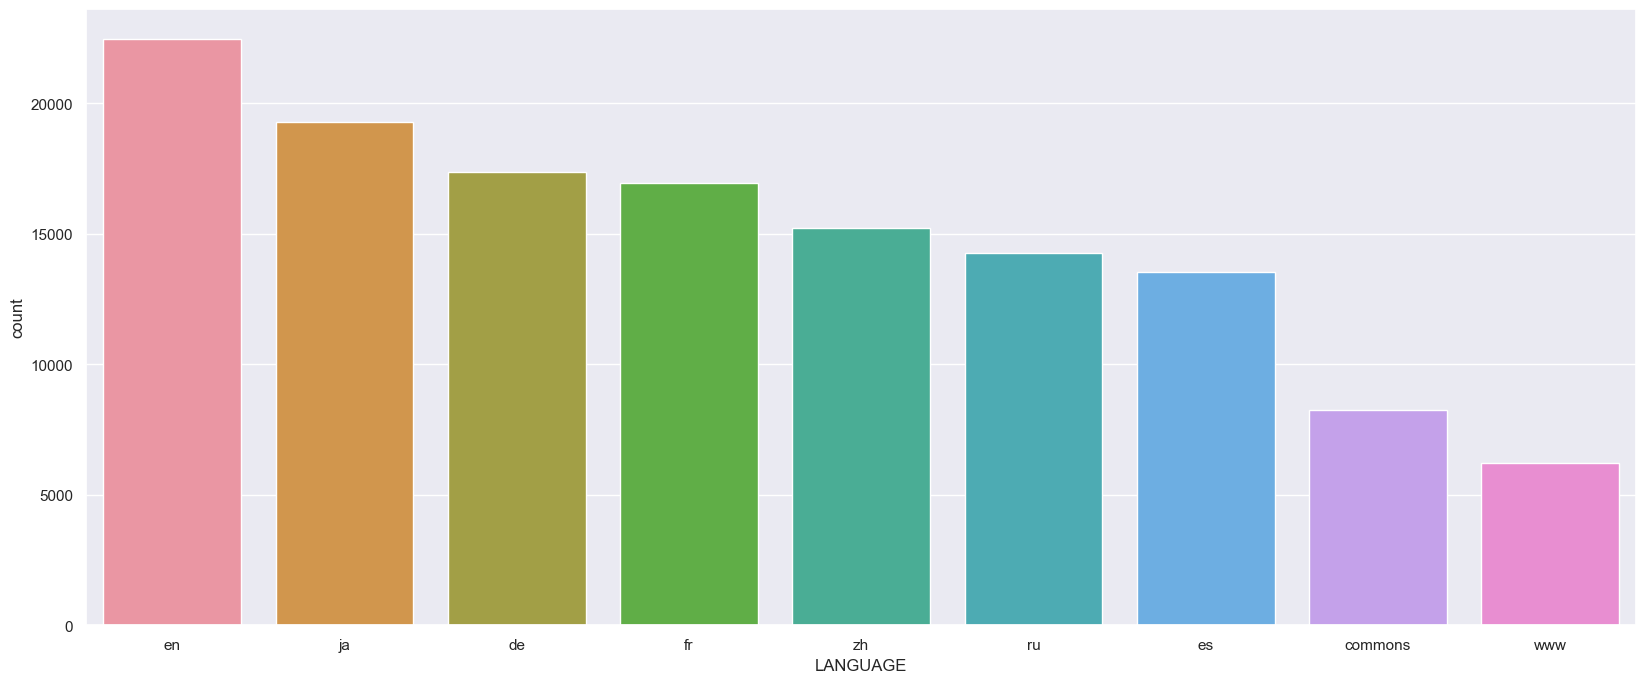

In [23]:
lang = new_df["LANGUAGE"].value_counts()

lang = lang.reset_index()

lang = lang.loc[lang["count"].argsort()[::-1]]

sns.barplot(x = lang["LANGUAGE"],y = lang["count"])


- Most common search language is english followed by japnese

#### Most common access type

In [24]:
acctyp = new_df["ACCESS TYPE"].value_counts()

acctyp = acctyp.reset_index()

acctyp = acctyp.loc[acctyp["count"].argsort()[::-1]]

sns.barplot(x = acctyp["ACCESS TYPE"],y = acctyp["count"])

<Axes: xlabel='ACCESS TYPE', ylabel='count'>

most used access type is all access

#### Most common access origin

<Axes: xlabel='ACCESS ORIGIN', ylabel='count'>

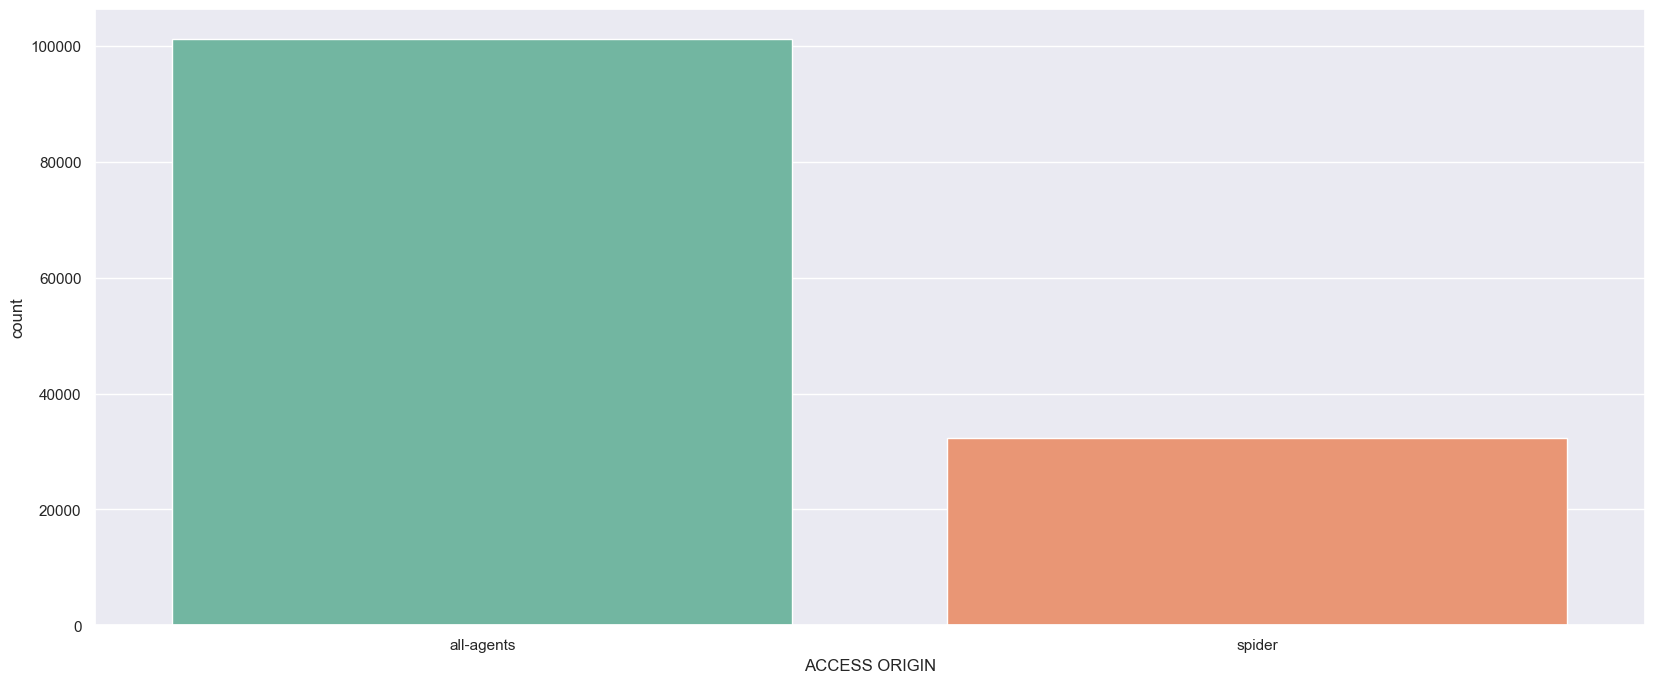

In [25]:
accor = new_df["ACCESS ORIGIN"].value_counts()

accor = accor.reset_index()

accor = accor.loc[accor["count"].argsort()[::-1]]

sns.barplot(x = accor["ACCESS ORIGIN"],y = accor["count"])

### Language vs Date

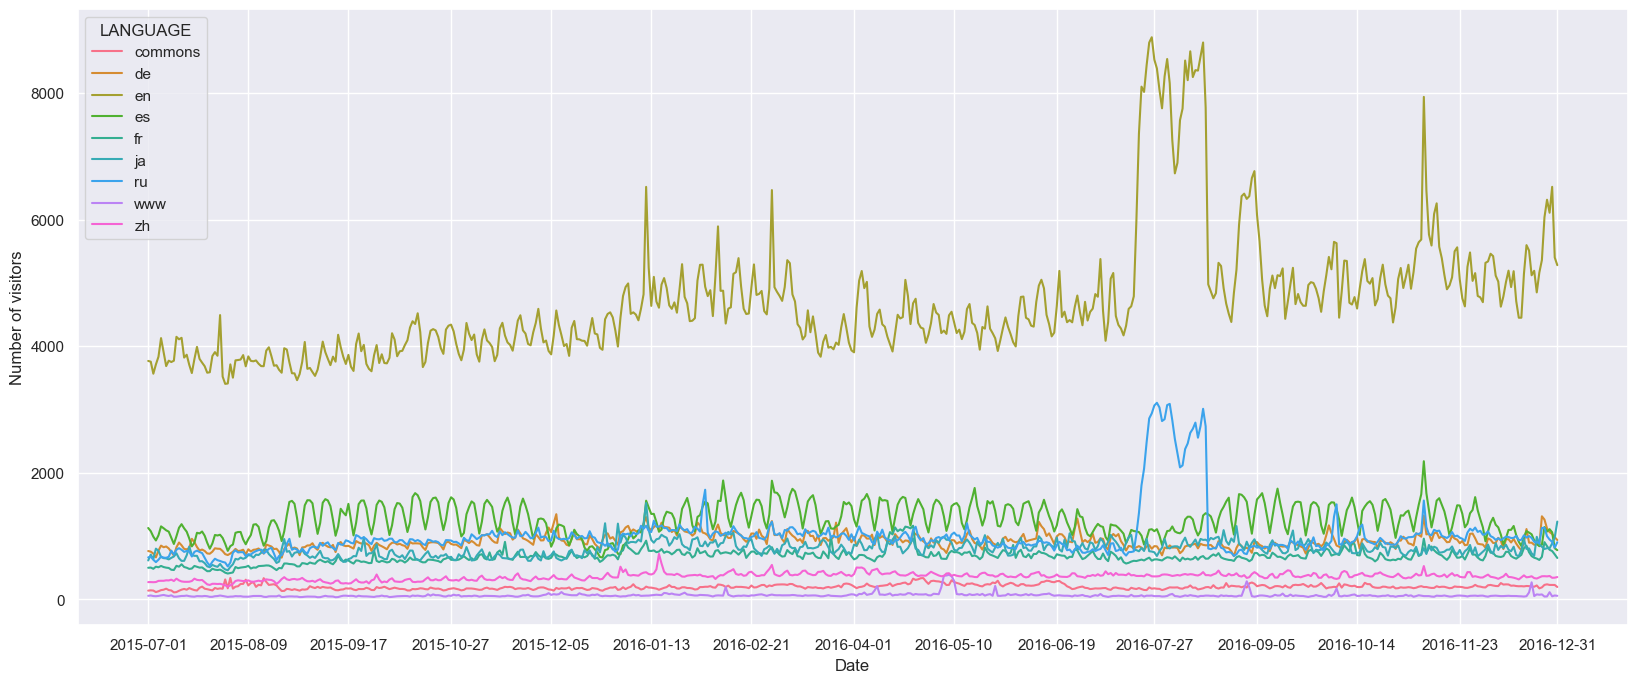

In [26]:
lang_df = new_df.drop(columns=["SPECIFIC NAME","ACCESS TYPE","ACCESS ORIGIN"])

lang_df= lang_df.melt(id_vars="LANGUAGE",value_name="Number of visitors",var_name="Date")

lang_df = lang_df.groupby(["LANGUAGE","Date"])["Number of visitors"].mean().reset_index()

sns.lineplot(x = lang_df["Date"],hue=lang_df["LANGUAGE"],y = lang_df["Number of visitors"])
plt.xticks(lang_df.iloc[np.ceil(np.linspace(0,lang_df.shape[0]-1,15))]["Date"].to_list())
plt.show()

#### Access Type vs Date

In [27]:
cols = ["SPECIFIC NAME","LANGUAGE","ACCESS TYPE","ACCESS ORIGIN"]
target = "Date"

1,2,3
0,2,3
0,1,3
0,1,2

In [28]:
order = []
targets = []
j=1
for i in range(len(cols)):
    temp = cols*j
    order.append(temp[i:i+3])
    targets.append(temp[i+3])
    j+=1


In [29]:
targets

['ACCESS ORIGIN', 'SPECIFIC NAME', 'LANGUAGE', 'ACCESS TYPE']

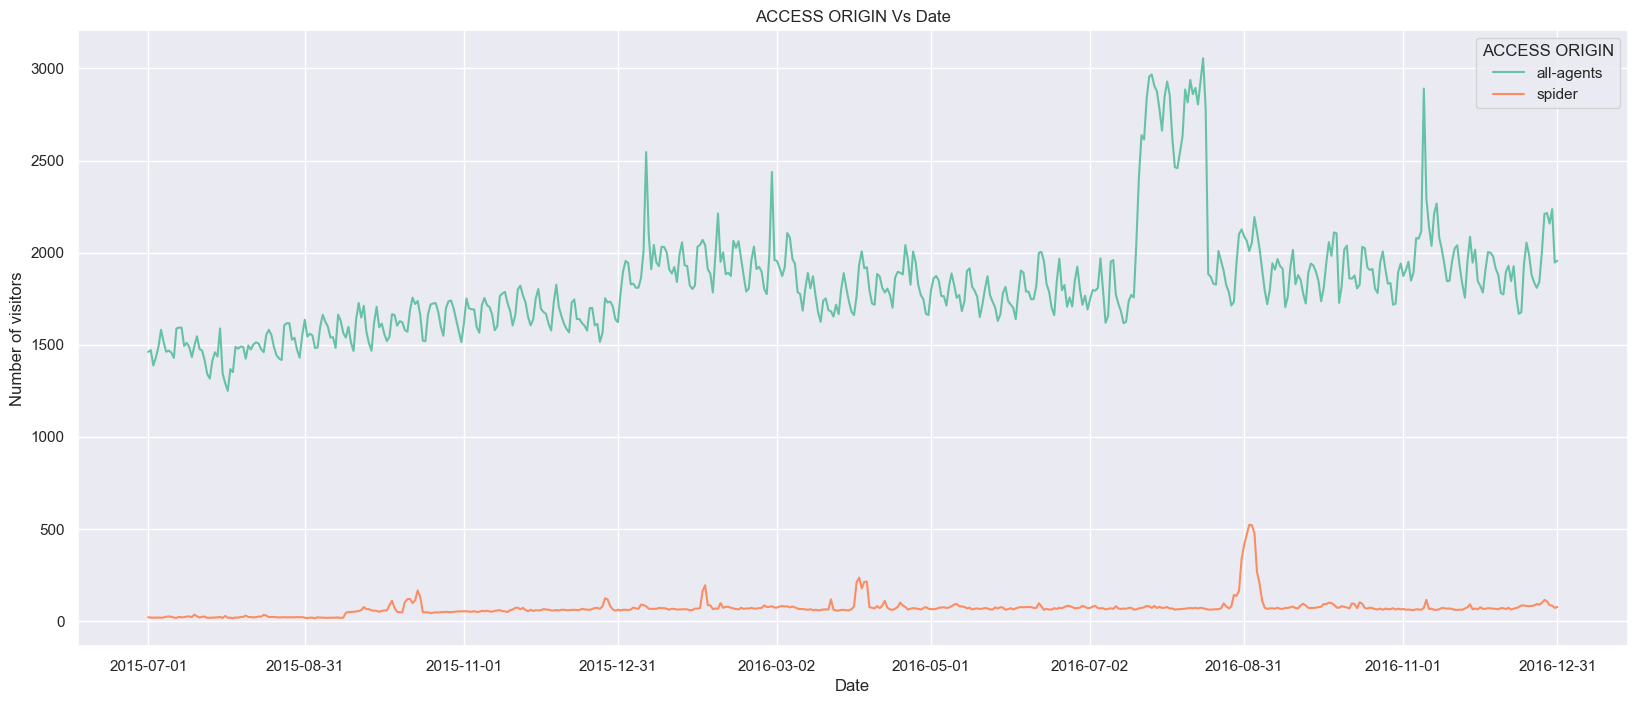

In [30]:
  
temp_df = new_df.drop(columns=order[0])

temp_df= temp_df.melt(id_vars=targets[0],value_name="Number of visitors",var_name="Date")
temp_df = temp_df.groupby([targets[0],"Date"])["Number of visitors"].mean().reset_index()
sns.lineplot(x = temp_df["Date"],hue=temp_df[targets[0]],y = temp_df["Number of visitors"])
plt.xticks(temp_df.iloc[np.ceil(np.linspace(0,temp_df.shape[0]-1,10))]["Date"].to_list())
plt.title(f"{targets[0]} Vs Date")
plt.show()

In [31]:
  
# temp_df = new_df.drop(columns=order[1])

# temp_df= temp_df.melt(id_vars=targets[1],value_name="Number of visitors",var_name="Date")
# temp_df = temp_df.groupby([targets[1],"Date"])["Number of visitors"].sum().reset_index()
# sns.lineplot(x = temp_df["Date"],hue=temp_df[targets[1]],y = temp_df["Number of visitors"])
# plt.xticks(temp_df.iloc[np.ceil(np.linspace(0,temp_df.shape[0]-1,10))]["Date"].to_list())
# plt.title(f"{targets[1]} Vs Date")
# plt.show()

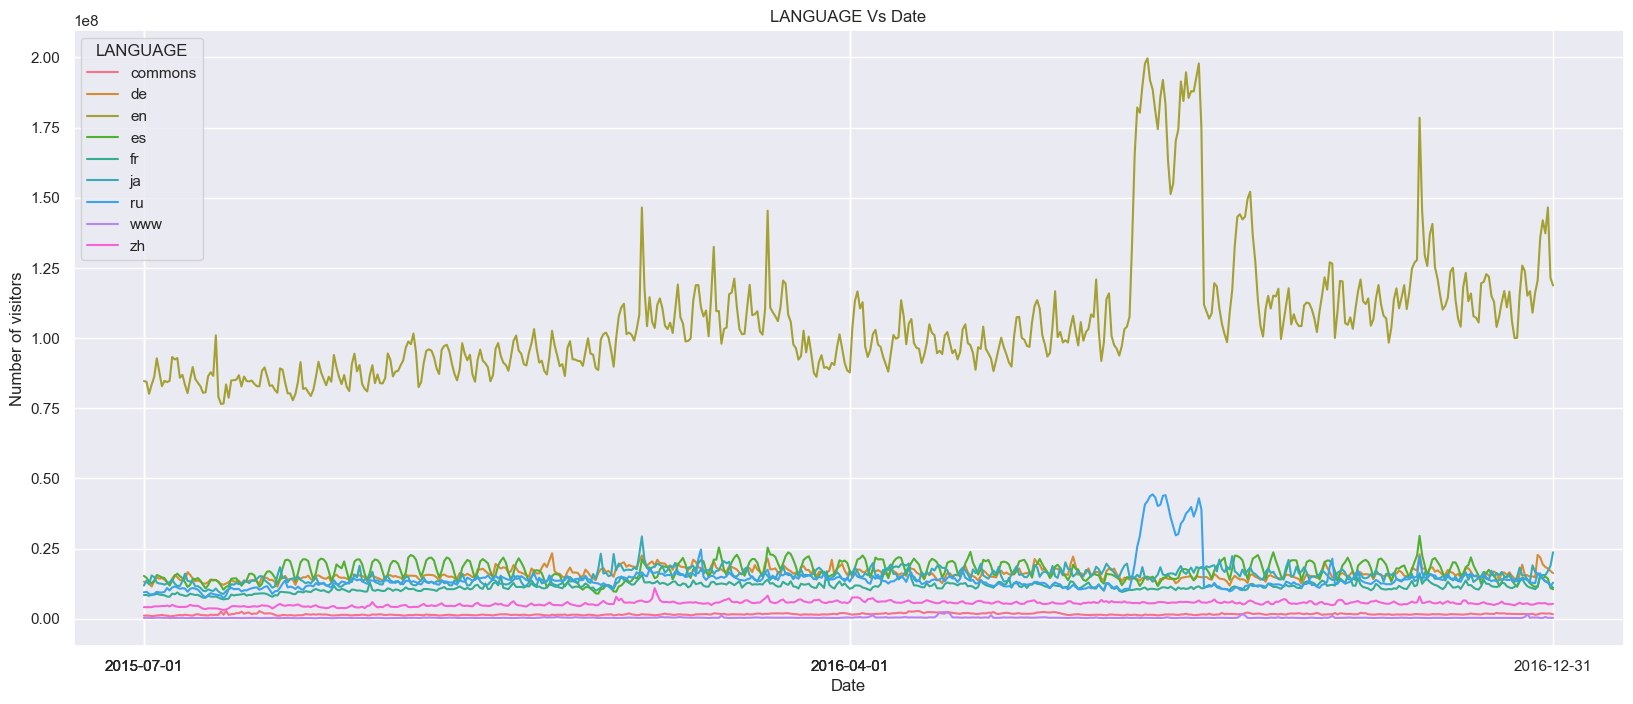

In [32]:
  
temp_df = new_df.drop(columns=order[2])

temp_df= temp_df.melt(id_vars=targets[2],value_name="Number of visitors",var_name="Date")
temp_df = temp_df.groupby([targets[2],"Date"])["Number of visitors"].sum().reset_index()
sns.lineplot(x = temp_df["Date"],hue=temp_df[targets[2]],y = temp_df["Number of visitors"])
plt.xticks(temp_df.iloc[np.ceil(np.linspace(0,temp_df.shape[0]-1,7))]["Date"].to_list())
plt.title(f"{targets[2]} Vs Date")
plt.show()

In [33]:
  
temp_df = new_df.drop(columns=order[3])

temp_df= temp_df.melt(id_vars=targets[3],value_name="Number of visitors",var_name="Date")
temp_df = temp_df.groupby([targets[3],"Date"])["Number of visitors"].mean().reset_index()
sns.lineplot(x = temp_df["Date"],hue=temp_df[targets[3]],y = temp_df["Number of visitors"])
plt.xticks(temp_df.iloc[np.ceil(np.linspace(0,temp_df.shape[0]-1,8))]["Date"].to_list())
plt.title(f"{targets[3]} Vs Date")
plt.show()

### Checking stationarity 

Formatting the data for the model

Dickey fuller test

Decomposition

Differencing

In [34]:
new_df_pvtd = new_df.melt(id_vars=["SPECIFIC NAME","LANGUAGE","ACCESS TYPE","ACCESS ORIGIN"],var_name="Date",value_name="Number of visitors")

In [35]:
new_df_pvtd.shape

(73489350, 6)

In [36]:
new_df_pvtd = new_df_pvtd.groupby(["SPECIFIC NAME","LANGUAGE","ACCESS TYPE","ACCESS ORIGIN","Date"])["Number of visitors"].mean()

In [37]:
new_df_pvtd = new_df_pvtd.reset_index()

In [38]:
new_df_pvtd.set_index("Date",inplace = True)

In [39]:
lang_df = lang_df[lang_df["LANGUAGE"] == "en"].set_index("Date")

In [40]:
lang_df.drop(columns="LANGUAGE",inplace = True)

<Axes: xlabel='Date'>

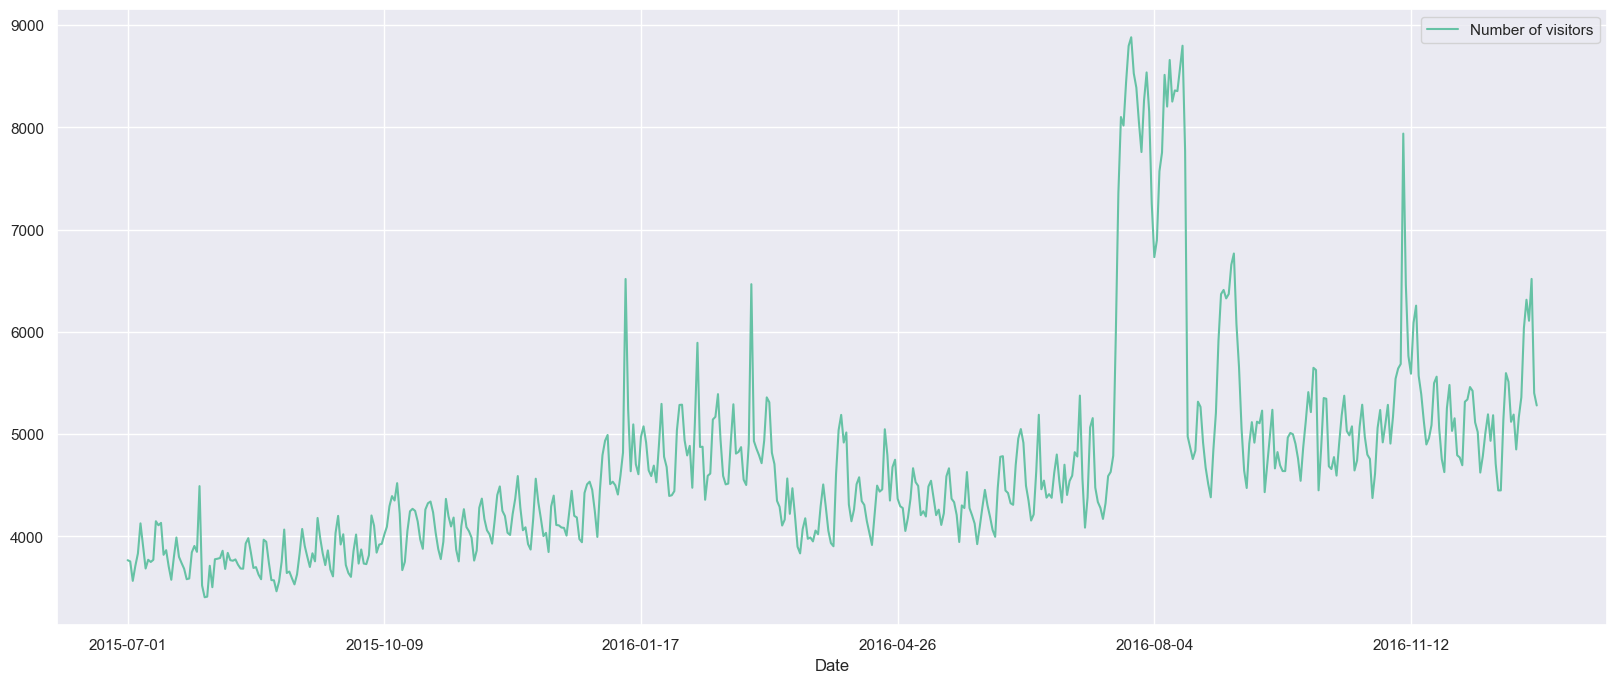

In [41]:
lang_df.plot()

In [42]:
result = sm.tsa.stattools.adfuller(lang_df["Number of visitors"])

In [43]:
print("Test Statistic (ADF): ", result[0])
print("P-value (ADF): ", result[1])
H0 = "Not Stationary"
H1 = "Stationary"
if result[1] < 0.05:
    print(f"Reject Null\n {H1}")
else:
    print(f"Failed to reject null hypothesis {H0}")

Test Statistic (ADF):  -2.373562974569941
P-value (ADF):  0.14933749437355304
Failed to reject null hypothesis Not Stationary


##### Decomposition

Differencing

In [44]:
lang_df

Number of visitors
Date                          
2015-07-01         3767.328604
2015-07-02         3755.158765
2015-07-03         3565.225696
2015-07-04         3711.782932
2015-07-05         3833.433025
...                        ...
2016-12-27         6314.335275
2016-12-28         6108.874144
2016-12-29         6518.058525
2016-12-30         5401.792360
2016-12-31         5280.643467

[550 rows x 1 columns]

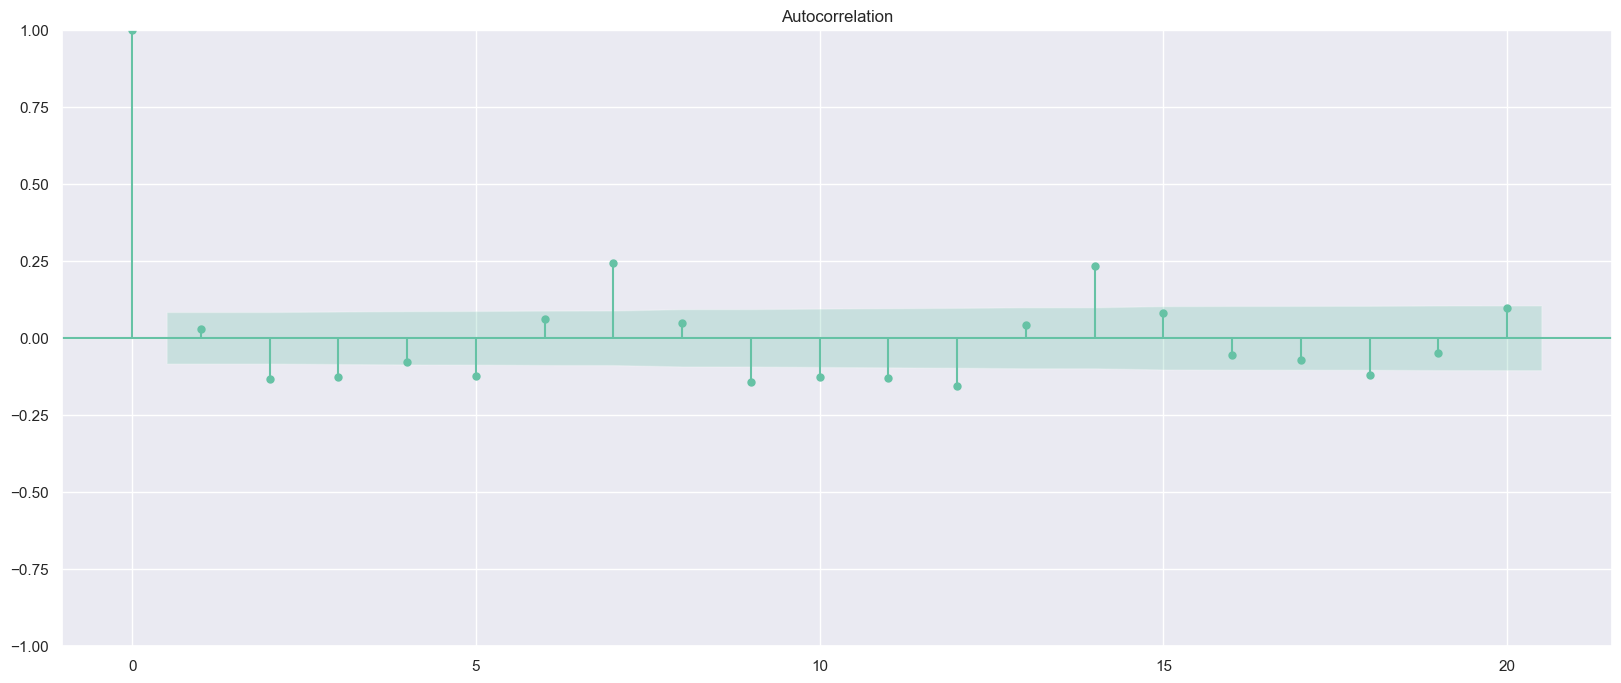

In [45]:
lag = lang_df - lang_df.shift(1)

lag = lag.dropna()

acf = plot_acf(lag,lags=20)

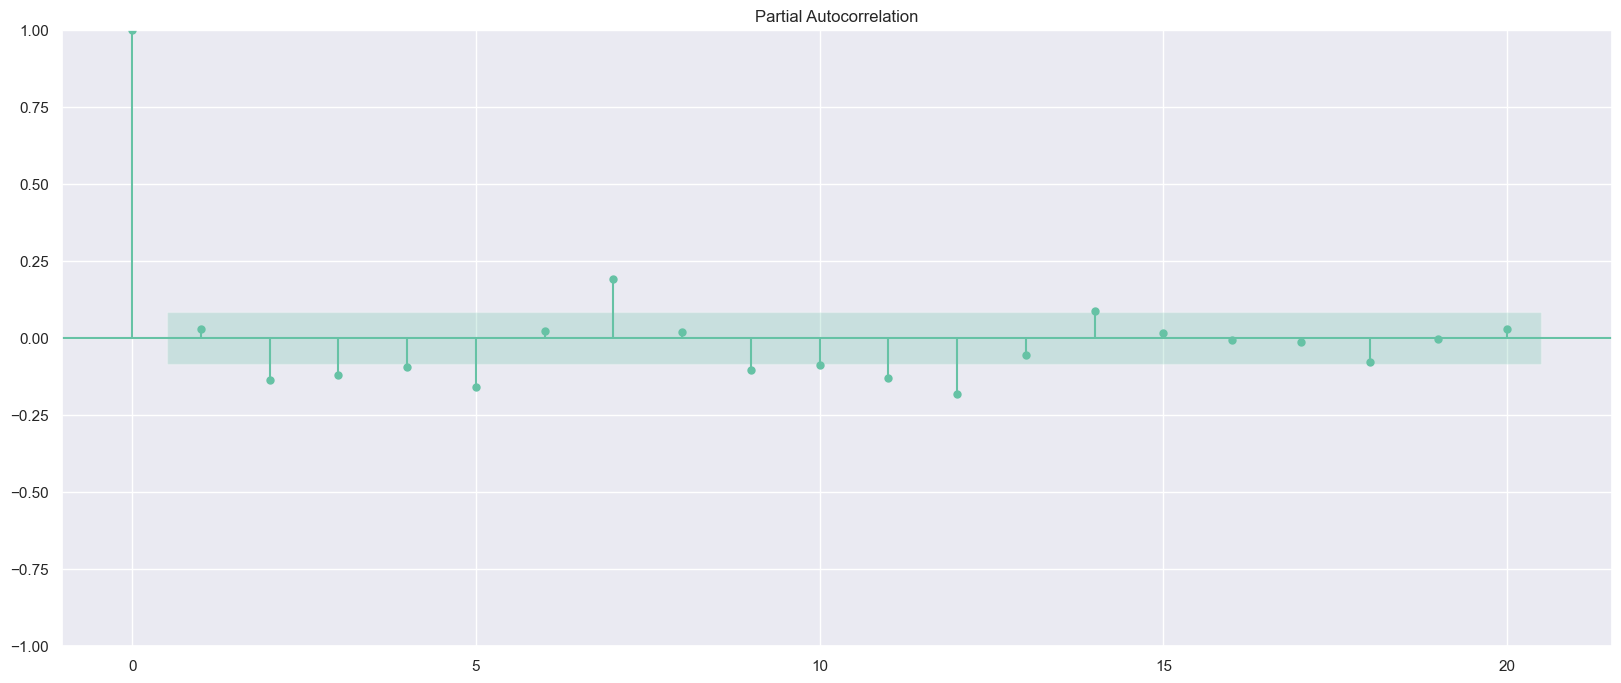

In [46]:
pacf = plot_pacf(lag,lags=20)

In [47]:
decompose = seasonal_decompose(lang_df["Number of visitors"],model="multiplicative",period = 7)

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.plot(lang_df)
plt.xticks(lang_df.iloc[np.ceil(np.linspace(0,lang_df.shape[0]-50,6))].index.to_list())
plt.title("Observed")
plt.subplot(4,1,2)
decompose.trend.plot()
plt.title("Trend")

plt.subplot(4,1,3)
decompose.seasonal.plot()
plt.title("Seasonality")

plt.subplot(4,1,4)
decompose.resid.plot()
plt.title("Residuals")


plt.tight_layout()
plt.show()


In [49]:
stationary  = lang_df["Number of visitors"] - decompose.trend - decompose.seasonal

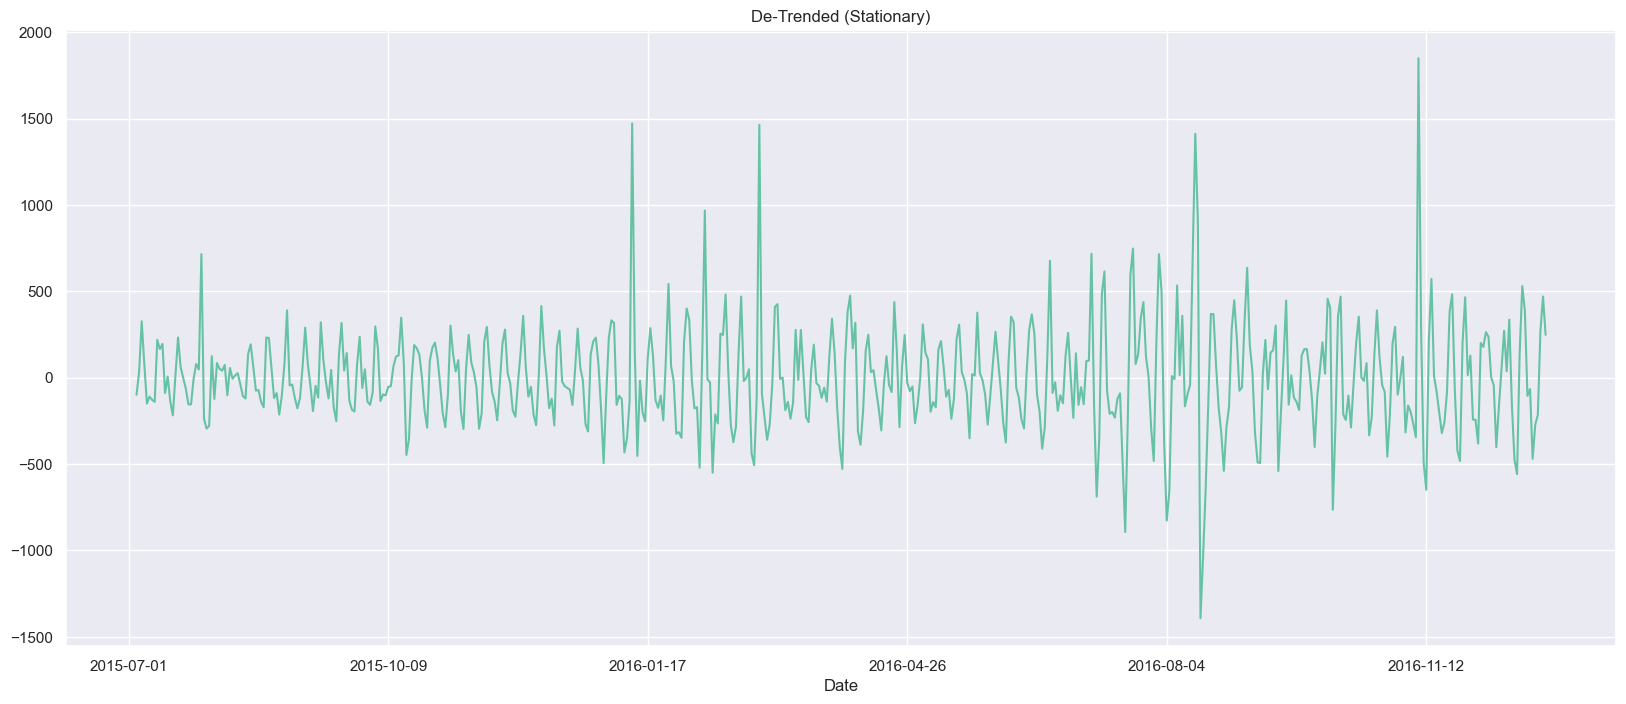

In [50]:
(stationary).plot()
plt.title("De-Trended (Stationary)")
plt.show()

In [51]:
result = sm.tsa.stattools.adfuller(stationary.dropna())

In [52]:
print("Test Statistic (ADF): ", result[0])
print("P-value (ADF): ", result[1])
H0 = "Not Stationary"
H1 = "Stationary"
if result[1] < 0.05:
    print(f"Reject Null\n{H1}")
else:
    print(f"Failed to reject null hypothesis {H0}")

Test Statistic (ADF):  -11.877234775761579
P-value (ADF):  6.298937221050704e-22
Reject Null
Stationary


##### ARIMA, SARIMAX 

In [53]:
lang_df["exog"] = df_exo.values

In [54]:
lang_df

Number of visitors  exog
Date                                
2015-07-01         3767.328604     0
2015-07-02         3755.158765     0
2015-07-03         3565.225696     0
2015-07-04         3711.782932     0
2015-07-05         3833.433025     0
...                        ...   ...
2016-12-27         6314.335275     1
2016-12-28         6108.874144     1
2016-12-29         6518.058525     1
2016-12-30         5401.792360     0
2016-12-31         5280.643467     0

[550 rows x 2 columns]

In [55]:
train = lang_df[:-30]
test = lang_df[-30:]

In [56]:
test.shape

(30, 2)

In [57]:
model = ARIMA(lang_df["Number of visitors"],order = (4,1,4))
fitmodel = model.fit()

In [58]:
pred = fitmodel.fittedvalues

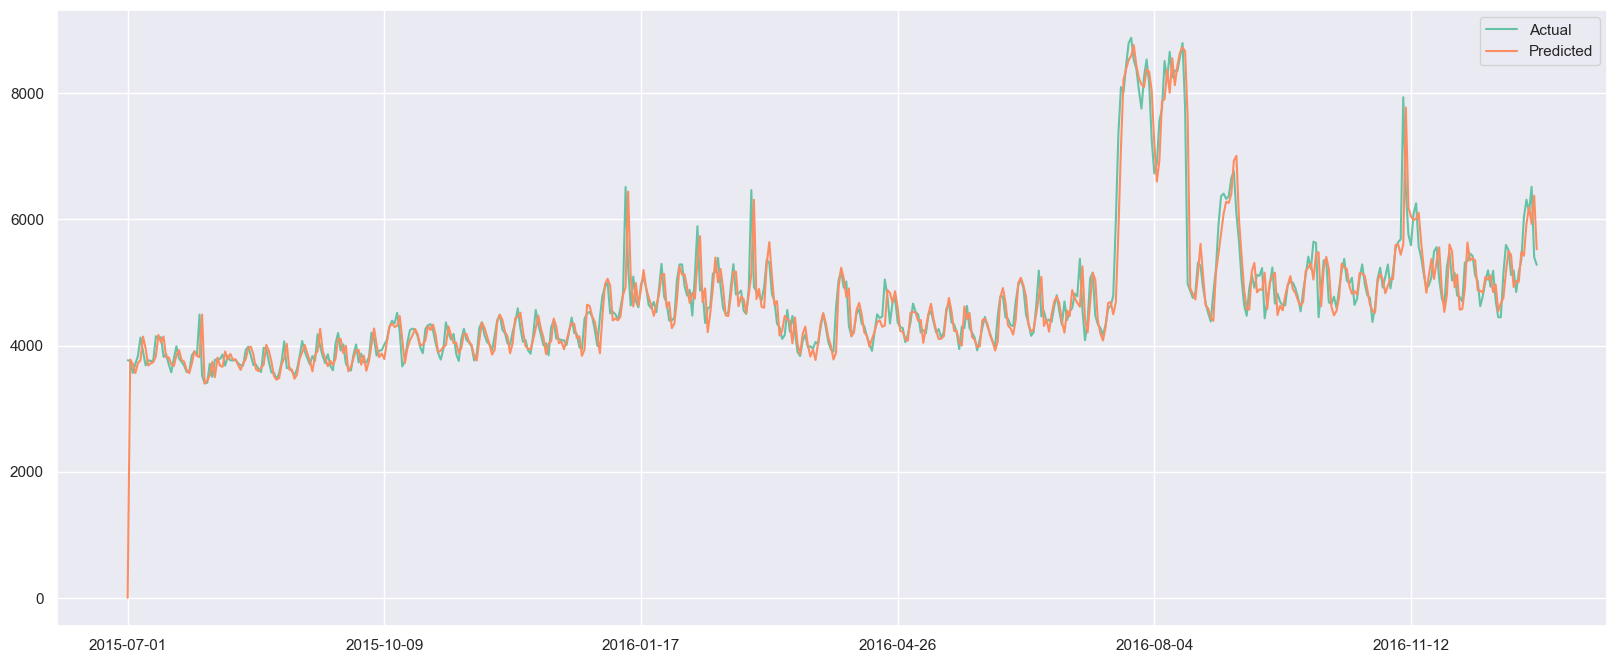

In [59]:
plt.plot(lang_df["Number of visitors"],label="Actual")
plt.plot(pred,label = "Predicted")
plt.xticks(lang_df.iloc[np.ceil(np.linspace(0,lang_df.shape[0]-50,6))].index.to_list())

plt.legend()
plt.show()

In [60]:
model = ARIMA(train["Number of visitors"],order=(4,1,3))
fit_model = model.fit()

In [61]:
pred= fit_model.forecast(30)

In [62]:
pred = pd.Series(pred,index = test.index)

In [63]:
# pred = pred.reset_index().set_index("index")

In [64]:
plt.plot(train["Number of visitors"],label = "Train")
plt.plot(test["Number of visitors"],label = "Actual")
plt.plot(pred,label="Predicted")
plt.xticks(lang_df.iloc[np.ceil(np.linspace(0,lang_df.shape[0]-50,6))].index.to_list())
plt.title("Actual v/s Predicted [en]")
plt.legend()
plt.show()

In [65]:
def MAPE(actual,pred):
    temp = (abs(actual-pred) )/ actual
    return np.mean(temp)*100

In [66]:
r = MAPE(test["Number of visitors"],pred.values)
print("MAPE for ARIMA: ",r )

MAPE for ARIMA:  6.814428553699618


In [67]:
order = (4,1,3)
sea = (1,1,1,7)

In [68]:
model = SARIMAX(lang_df["Number of visitors"],order = order,seasonal_order=sea,exog = lang_df["exog"],alpha = 0.02)
fitmodel = model.fit()

In [69]:
pred = fitmodel.fittedvalues

In [70]:
plt.plot(pred,label="Predicted")
plt.plot(lang_df["Number of visitors"],label = "Actual")
plt.legend()
plt.show()

In [71]:
order = (4,1,3)
sea = (1,1,1,7)

In [72]:
model  = SARIMAX(train["Number of visitors"],order = order,seasonal_order=sea,exog = train["exog"])
fit_model = model.fit()

In [73]:
pred = fit_model.forecast(30,exog =test["exog"] )

In [74]:
pred = pd.Series(pred,index = test.index)

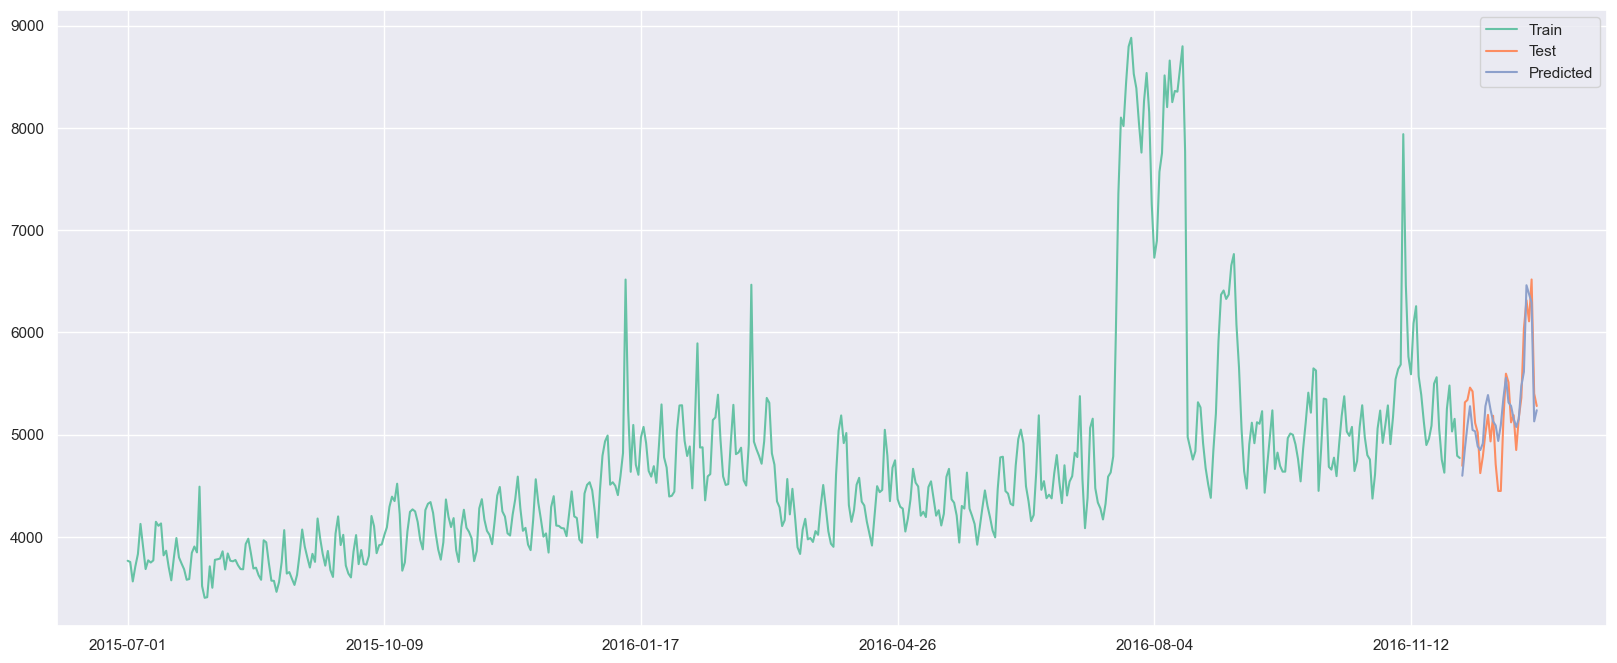

In [75]:
plt.plot(train["Number of visitors"],label="Train")
plt.plot(test["Number of visitors"],label = "Test")
plt.plot(pred,label = "Predicted")
plt.xticks(lang_df.iloc[np.ceil(np.linspace(0,lang_df.shape[0]-50,6))].index.to_list())
plt.legend()
plt.show()

In [76]:
r = MAPE(test["Number of visitors"],pred.values)
print("MAPE for SARIMAX: ",r )

MAPE for SARIMAX:  4.313700704760374


#### Forecast for different language

In [77]:
new_df_pvtd["LANGUAGE"].unique()

array(['ru', 'en', 'www', 'de', 'es', 'ja', 'zh', 'fr', 'commons'],
      dtype=object)

In [78]:
df.loc[77987]["Page"]

'Commons:Categories_commons.wikimedia.org_mobile-web_all-agents'

In [79]:
df.sample(3)

Page  2015-07-01  \
102926       Турция_ru.wikipedia.org_desktop_all-agents      1509.0   
47969   Philipp_Lahm_de.wikipedia.org_all-access_spider         2.0   
101409    Metallica_ru.wikipedia.org_desktop_all-agents      1244.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
102926      1382.0      1292.0      1090.0      1180.0      2090.0   
47969         11.0         9.0         2.0         1.0         9.0   
101409      1218.0      1140.0      1210.0      1228.0      1275.0   

        2015-07-07  2015-07-08  2015-07-09  ...  2016-12-22  2016-12-23  \
102926      1880.0      1779.0      1797.0  ...      1836.0      1641.0   
47969          4.0         4.0         4.0  ...         7.0        11.0   
101409      1309.0      1261.0      1381.0  ...      1819.0      2009.0   

        2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
102926      1243.0      1672.0      1517.0      1400.0      1390.0   
47969         10.0        10.0        12.0        12.0         9.0   
101409      1704.0      1796.0      1746.0      1685.0      1809.0   

        2016-12-29  2016-12-30  2016-12-31  
102926      1255.0      1204.0       710.0  
47969          8.0         4.0         8.0  
101409      1721.0      1472.0      1492.0  

[3 rows x 551 columns]

In [80]:
def LangReplace(x):
    if x == "www" or x == "commons":
        return "NA"
    return x

In [81]:
n = new_df_pvtd["LANGUAGE"].apply(lambda x : LangReplace(x))

In [82]:
n.unique()

array(['ru', 'en', 'NA', 'de', 'es', 'ja', 'zh', 'fr'], dtype=object)

In [83]:
language_codes = {
    'ru': 'Russian',
    'en': 'English',
    'NA': 'No Languge', 
    'de': 'German',
    'es': 'Spanish',
    'ja': 'Japanese',
    'zh': 'Chinese',
    'fr': 'French'
}
new_df_pvtd["LANGUAGE"] = n

In [84]:
new_df_pvtd["LANGUAGE"].unique()

array(['ru', 'en', 'NA', 'de', 'es', 'ja', 'zh', 'fr'], dtype=object)

In [85]:
def grid_search(data):
    trend = [1,2,3,4]
    optimal = []
    mape=100
    prediction = 0
    for p in trend:
        for d in trend:
            for q in trend:
                model = ARIMA(data[:-30],order = (p,d,q))
                fit_model = model.fit()
                pred = fit_model.forecast(30)
                result = MAPE(data[-30:].values,pred)
                if result < mape:
                    mape = result
                    optimal = [p,d,q]
                    prediction = pred
                else:
                    pass
    return mape, optimal,prediction

In [86]:
# grid_search(lang_df["Number of visitors"])

In [87]:
final_df = new_df_pvtd.drop(columns=["SPECIFIC NAME","ACCESS TYPE","ACCESS ORIGIN"]).reset_index()

In [88]:
final_df = final_df.groupby(["Date","LANGUAGE"])["Number of visitors"].mean().reset_index()

In [89]:
final_df = final_df.pivot(index="Date",columns="LANGUAGE",values="Number of visitors")

In [90]:
def arima_model(data,mape,pred):
    print("Language: ",language_codes[data.name])
    print("MAPE    : ",mape)
    print(" ")
    pred = pd.Series(pred,index=data[-30:].index)
    sns.lineplot(data[:-30],label="Training")
    sns.lineplot(data[-30:],label="Actual")
    sns.lineplot(pred,label="Predicted")
    plt.xticks(lang_df.iloc[np.ceil(np.linspace(0,lang_df.shape[0]-50,6))].index.to_list())
    plt.ylabel("Number of visitors")
    plt.title(f"Actual vs predicted for {language_codes[data.name]}")
    plt.legend()
    plt.show()

In [91]:
mape,optimal,pred = grid_search(final_df["en"])

Language:  English
MAPE    :  6.645827877438746
 


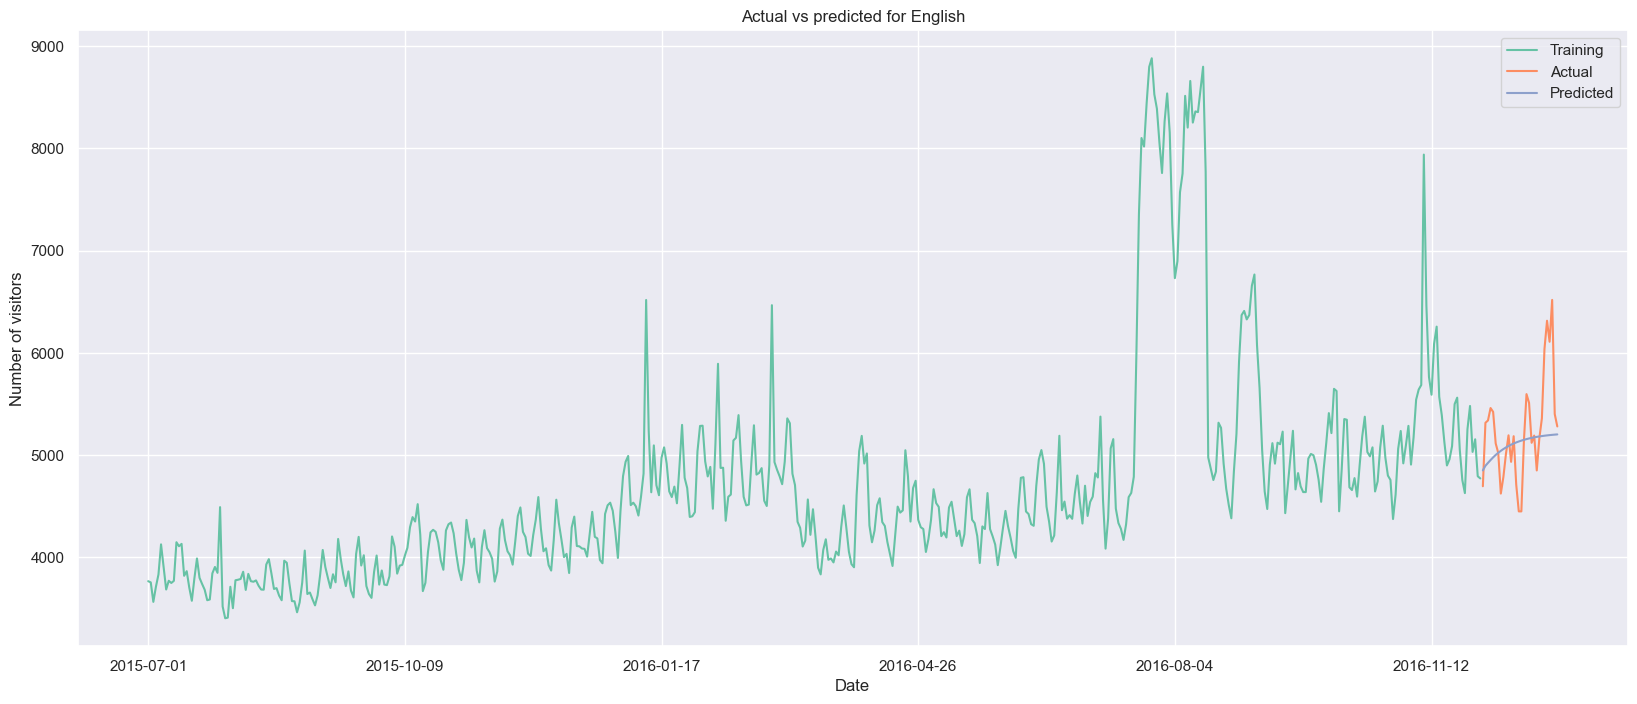

In [92]:
arima_model(final_df["en"],mape,pred)

In [93]:
columns = final_df.columns

Language:  No Languge
MAPE    :  7.39389719470829
 


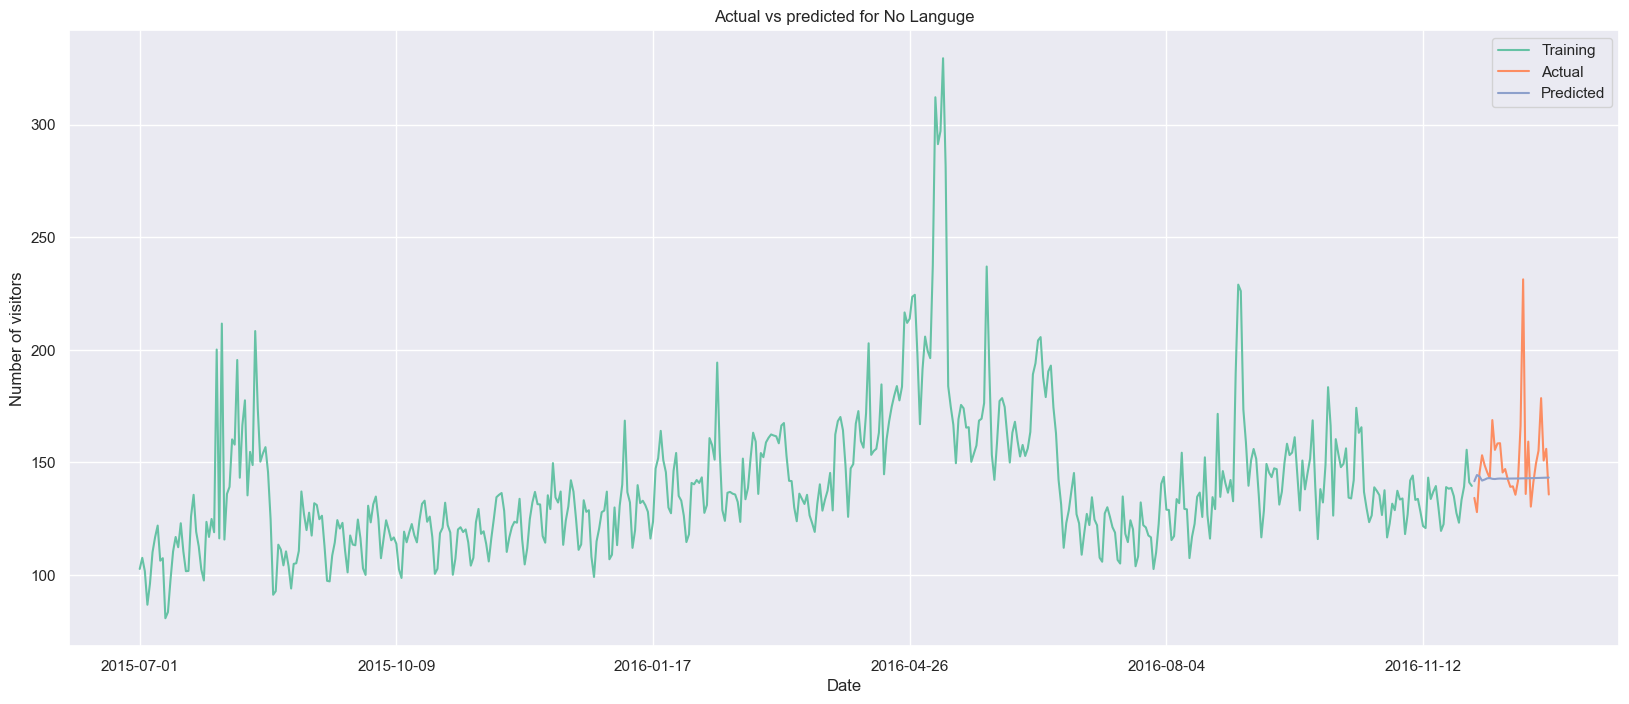

Language:  German
MAPE    :  7.491263965413488
 


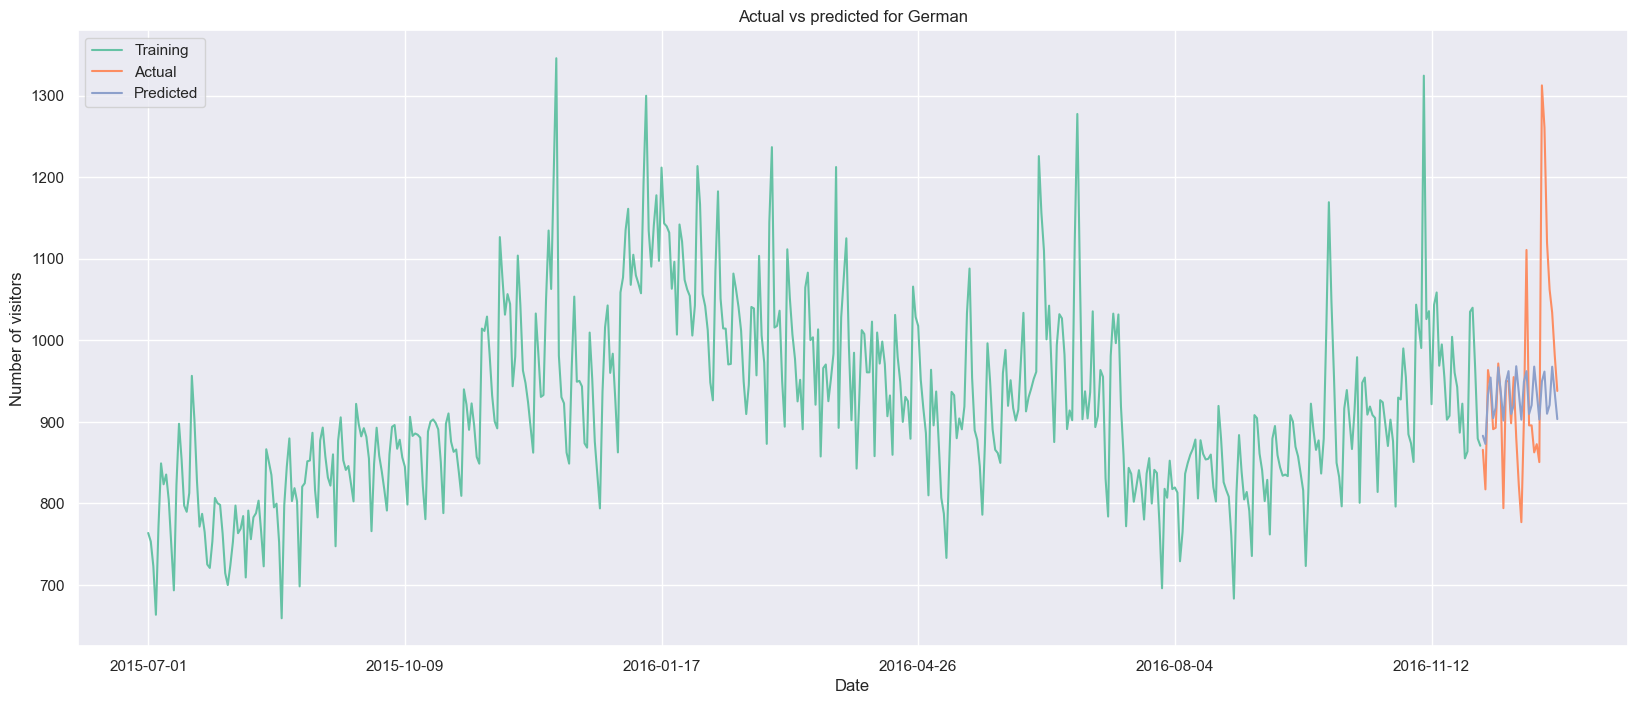

Language:  English
MAPE    :  6.645827877438746
 


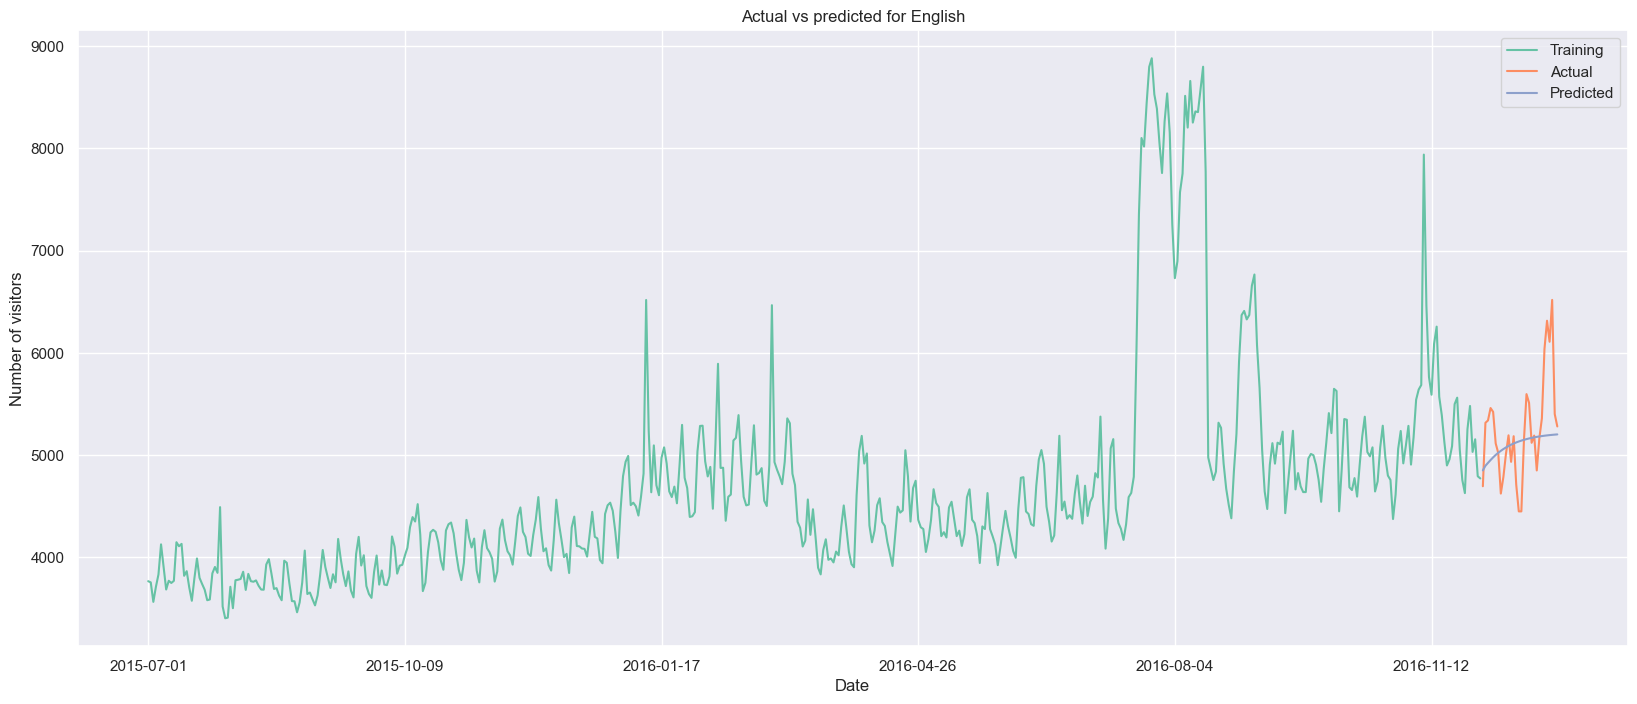

Language:  Spanish
MAPE    :  18.024961820028455
 


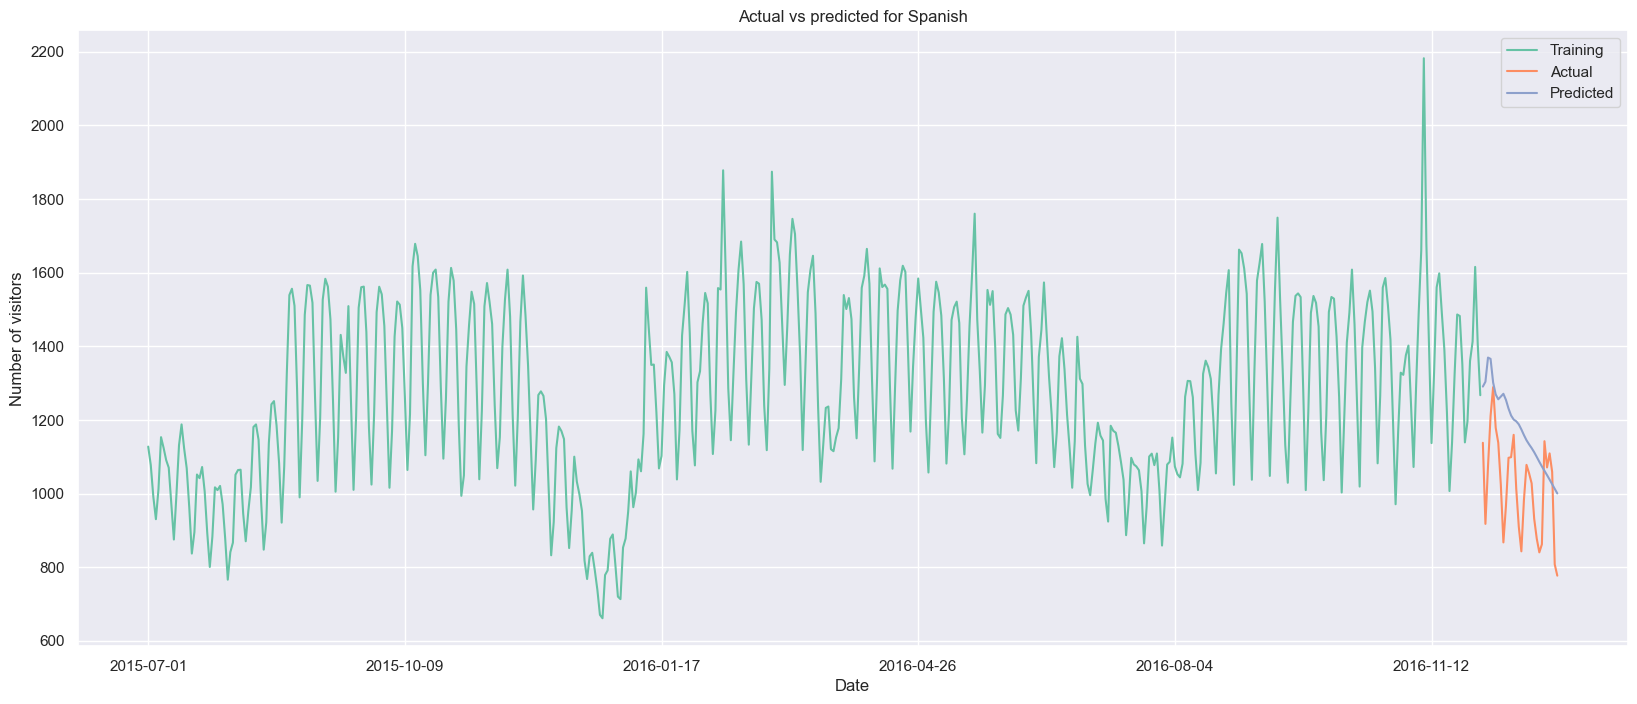

Language:  French
MAPE    :  7.284648139504299
 


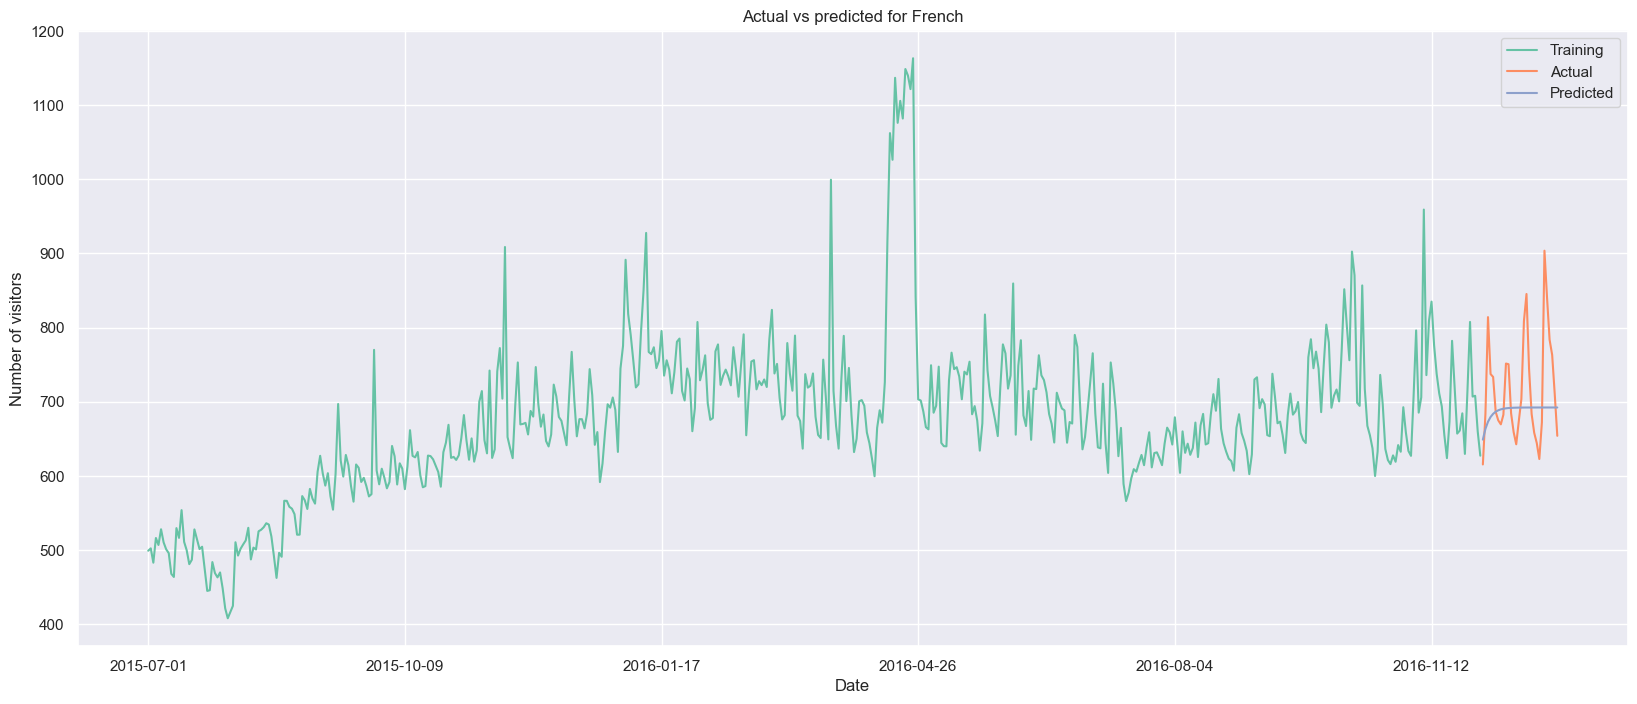

Language:  Japanese
MAPE    :  8.309496169884852
 


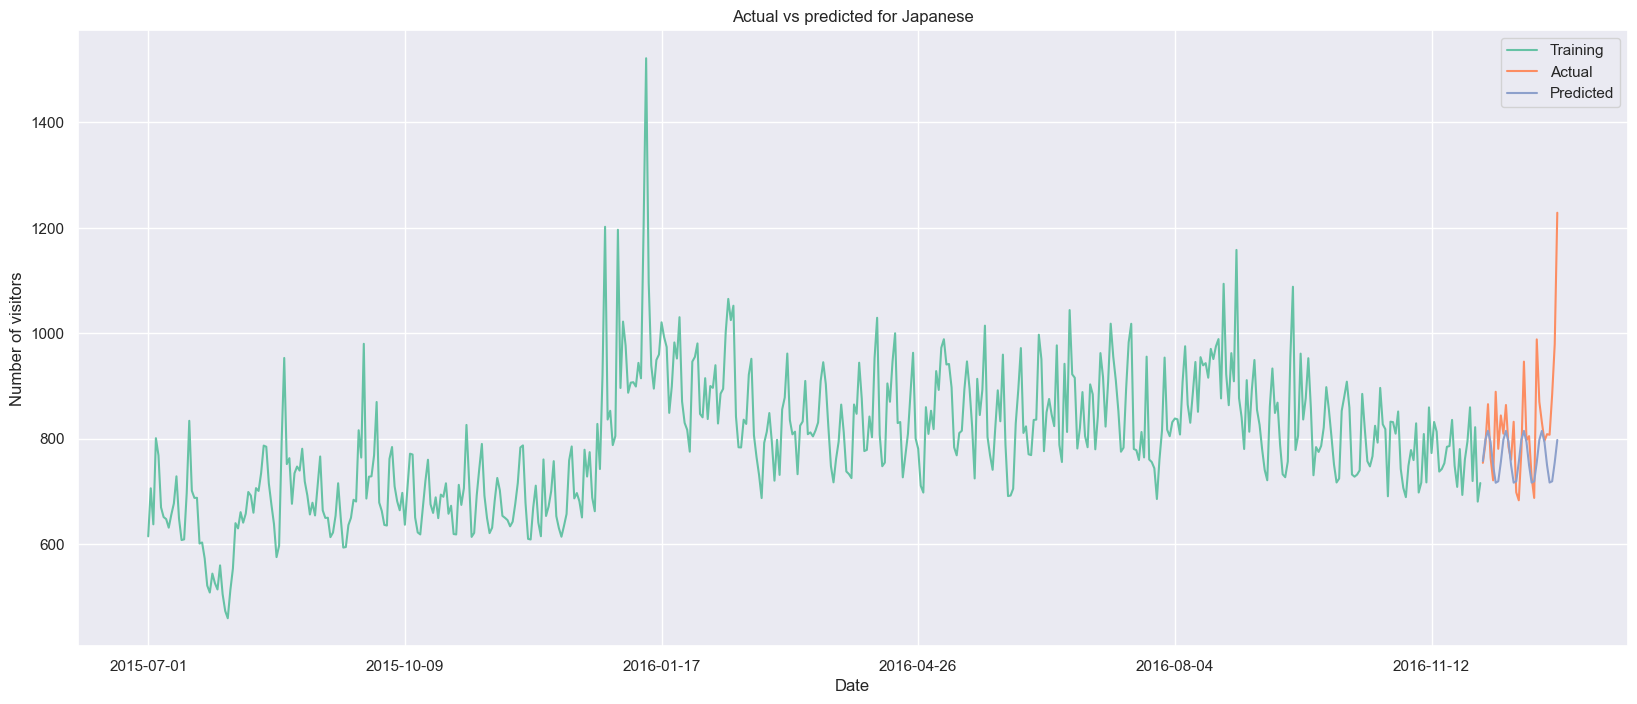

Language:  Russian
MAPE    :  5.4742375418758344
 


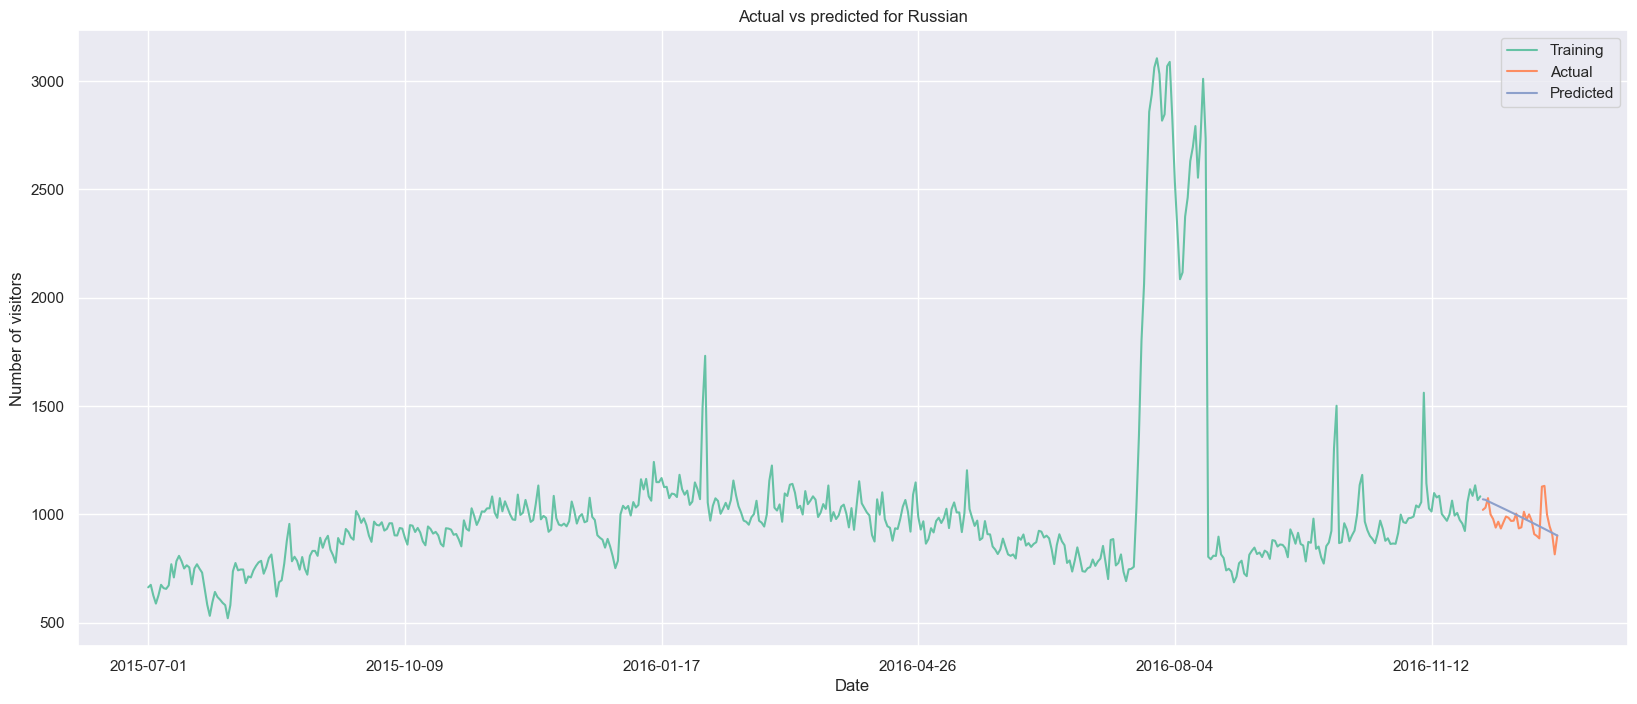

Language:  Chinese
MAPE    :  3.878927986098346
 


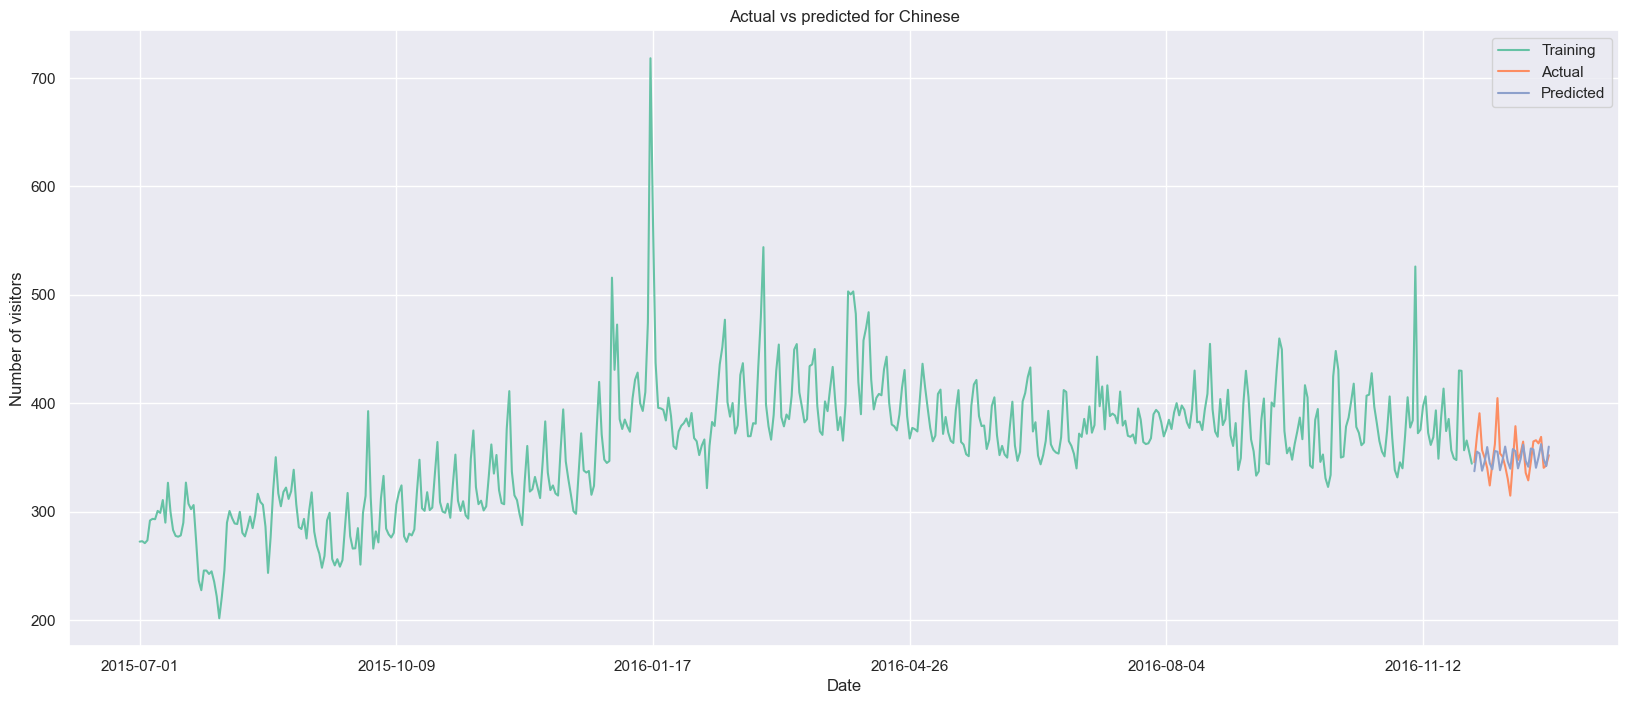

In [94]:
for language in columns:
    mape,optimal,pred = grid_search(final_df[language])
    arima_model(final_df[language],mape,pred)

### Questionnaire:

#### Defining the problem statements and where can this and modifications of this be used?

- As a member of the Data Science team at this company, the task is to analyze the per-page view report for a dataset containing 145,000 Wikipedia pages over a span of 550 days. The goal is to forecast the number of views for each page to predict and optimize ad placement for clients belonging to different regions.

#### Write 3 inferences you made from the data visualizations
- Most used access type is all access, mobile-web and desktop are almost same.
- Most common search language is english followed by japnese
- Seasonality was found to be 7 days
- Most common access origin is through all agents.
#### What does the decomposition of series do?
- Decomposition of a time series refers to the process of breaking down the series into its 3 components: trend, seasonality, and noise (or residual).
#### What level of differencing gave you a stationary series?
- Single level
#### Difference between arima, sarima & sarimax.
- ARIMA
-- ARIMA models are used to model and forecast time series data that exhibit non-stationarity
-- ARIMA does not explicitly handle seasonality in the data
- SARIMA
-- SARIMA extends ARIMA to handle seasonal patterns in time series data.
- SARIMAX
-- SARIMAX further extends SARIMA by allowing for the inclusion of exogenous variables, which are external factors that may influence the time series being modeled.

#### Compare the number of views in different languages
<table border="1">
  <tr>
    <th>LANGUAGE</th>
    <th>count</th>
  </tr>
  <tr>
    <td>English</td>
    <td>22486</td>
  </tr>
  <tr>
    <td>Japanese</td>
    <td>19295</td>
  </tr>
  <tr>
    <td>Germal</td>
    <td>17362</td>
  </tr>
  <tr>
    <td>French</td>
    <td>16948</td>
  </tr>
  <tr>
    <td>Chinese</td>
    <td>15211</td>
  </tr>
  <tr>
    <td>Russian</td>
    <td>14270</td>
  </tr>
  <tr>
    <td>Spanish</td>
    <td>13551</td>
  </tr>
  <tr>
    <td>NO_Language</td>
    <td>14,494</td>
  </tr>

</table>


#### What other methods other than grid search would be suitable to get the model for all languages?
- Ensemble Methods
- Cross-Validation
- Random Search